In [40]:

import time

import pickle

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import additional_functions as af
import seaborn as sns
import argparse
from model import CRAB_Model

seed_value = 12345678
random.seed(seed_value)
np.random.seed(seed=seed_value)

import dill as pickle
import os

In [41]:
def load_model(filename):
    with open(filename, 'rb') as f:
        model = pickle.load(f)
    return model

In [45]:
# load the model
macro_variables = pd.read_csv('macro_variables.csv')

In [46]:
macro_variables

,Flood,Year,HH consumption,Regional demand,Export demand,Unemployment rate,Min wage,Avg wage,Step
0,False,2020,6519.444235,6519.445,0.0,0.87,0.600,0.999572,1
1,False,2020,7362.529235,7362.529,0.0,0.69,0.600,1.037128,2
2,False,2020,8271.953235,8271.954,0.0,0.51,0.624,1.038769,3
3,False,2020,8933.694448,8933.695,0.0,0.35,0.624,1.038606,4
4,False,2020,8875.178838,9206.179,0.0,0.32,0.624,1.033613,5
5,False,2020,9498.053019,9613.553,0.0,0.18,0.618,1.032681,6
6,False,2020,9590.007209,9656.507,0.0,0.17,0.618,1.032866,7
7,False,2020,9542.655945,9584.156,0.0,0.19,0.618,1.033666,8
8,False,2020,9349.210038,9735.709,0.0,0.19,0.618,1.034453,9
9,False,2020,9536.754363,9642.754,0.0,0.18,0.618,1.034797,10


In [50]:
macro_variables[macro_variables['Year'] == t]['Step'].iloc[0]

21

In [47]:
t = 2021

In [48]:
first_step = macro_variables[macro_variables['Year'] == t]['Step'][0]
last_step = macro_variables[macro_variables['Year'] == t]['Step'].iloc[-1]


KeyError: 0

In [10]:
# Read all model variables to list
model_vars_df_list = []
for file in os.listdir("results/"):
    if file.startswith("saved"):
        df = pd.read_pickle("results/" + file)
        model_vars_df_list.append(df)

# Show first dataframe
model_vars_df_list[0]

In [11]:
model_vars_df_list

In [28]:
macro_variables = []
micro_variables = []
for i in range(len(model_vars_df_list)):
    macro_variables.append(model_vars_df_list[i].datacollector.get_model_vars_dataframe())
    macro_variables[i]['seed'] = i
    macro_variables[i]['Steps'] = macro_variables[i].index
    micro_variables.append(model_vars_df_list[i].datacollector.get_agent_vars_dataframe())
macro_variables = pd.concat(macro_variables)
micro_variables = pd.concat(micro_variables)
    

In [24]:
macro_variables

,Flood,n_agents,n_households,n_Industry_capital_firms,n_ind_firms,n_cons_firms,n_trans_firms,n_agr_firms,n_priv_serv_firms,n_pub_serv_firms,n_pub_utilities_firms,n_retail_firms,HH consumption,Regional demand,Export demand,Unemployment rate,Min wage,Avg wage,seed,Steps
0,False,11301,10000,150,300,200,150,100,100,100,100,100,6519.837474,6519.837000,0.0,0.87,0.600,0.999875,0,0
1,False,11301,10000,150,300,200,150,100,100,100,100,100,7358.067474,7358.067000,0.0,0.69,0.600,1.036397,0,1
2,False,11301,10000,150,300,200,150,100,100,100,100,100,8279.572474,8279.574000,0.0,0.51,0.624,1.038379,0,2
3,False,11301,10000,150,300,200,150,100,100,100,100,100,8907.703966,8907.704000,0.0,0.36,0.624,1.038755,0,3
4,False,11301,10000,150,300,200,150,100,100,100,100,100,8798.207359,9200.208000,0.0,0.33,0.624,1.033707,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,False,11301,10000,150,300,200,150,100,100,100,100,100,9862.412674,9900.575000,0.0,0.11,0.624,1.037850,4,119
120,False,11301,10000,150,300,200,150,100,100,100,100,100,9856.082594,10056.213414,0.0,0.11,0.624,1.037428,4,120
121,False,11301,10000,150,300,200,150,100,100,100,100,100,9919.988085,10058.985772,0.0,0.10,0.624,1.037226,4,121
122,False,11301,10000,150,300,200,150,100,100,100,100,100,9895.254784,9992.972000,0.0,0.10,0.624,1.037552,4,122


<Axes: xlabel='Steps', ylabel='HH consumption'>

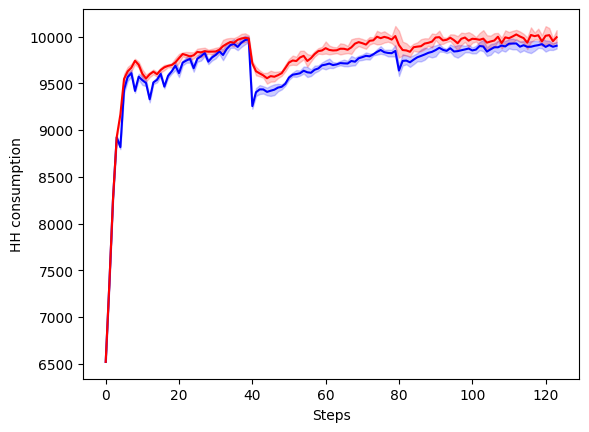

In [26]:

sns.lineplot(data=macro_variables, x='Steps', y='HH consumption' ,color='blue')
sns.lineplot(data=macro_variables, x='Steps', y='Regional demand', color='red')




<Axes: xlabel='Steps', ylabel='Unemployment rate'>

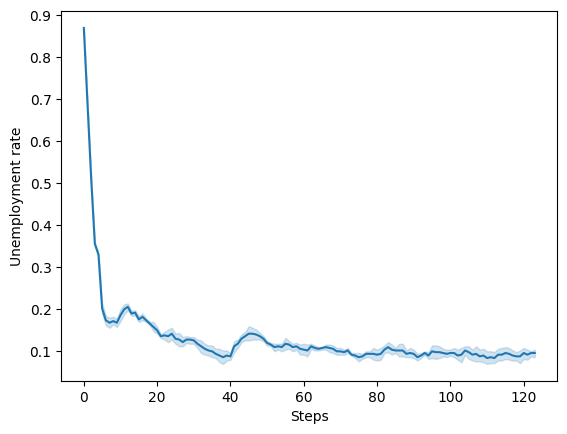

In [29]:
sns.lineplot(data=macro_variables, x='Steps', y='Unemployment rate')

In [33]:
micro_variables.reset_index(inplace=True)

In [36]:
micro_variables

,Step,AgentID,Type,Net worth,Price,Market share,Prod,Inventories,N ordered,Production made,...,Sum past demand,Past demand,Real demand,Wage,Debt,Size,Supplier,Labor demand,KL ratio,Capital amount
0,1,1,<class 'CRAB_agents.Industry_capital'>,100.000000,1.166000,0.006667,1.109,1.11,0.0,1.11,...,3.0,1.0,0.0,0.994338,0.0,1.0,<CRAB_agents.Industry_capital object at 0x13f6...,1.0,0.689399,80.0
1,1,2,<class 'CRAB_agents.Industry_capital'>,100.000000,1.253000,0.006667,1.067,1.07,0.0,1.07,...,3.0,1.0,0.0,1.028585,0.0,1.0,<CRAB_agents.Industry_capital object at 0x13e6...,1.0,0.689399,80.0
2,1,3,<class 'CRAB_agents.Industry_capital'>,100.000000,1.231000,0.006667,1.045,1.04,0.0,1.04,...,3.0,1.0,0.0,0.990151,0.0,1.0,<CRAB_agents.Industry_capital object at 0x13f2...,1.0,0.689399,76.0
3,1,4,<class 'CRAB_agents.Industry_capital'>,100.000000,1.232000,0.006667,1.071,1.07,0.0,1.07,...,3.0,1.0,0.0,1.015594,0.0,1.0,<CRAB_agents.Industry_capital object at 0x13fe...,1.0,0.689399,80.0
4,1,5,<class 'CRAB_agents.Industry_capital'>,100.000000,1.225000,0.006667,1.066,1.07,0.0,1.07,...,3.0,1.0,0.0,1.004832,0.0,1.0,<CRAB_agents.Industry_capital object at 0x13fa...,1.0,0.689399,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7006615,124,12575,<class 'CRAB_agents.Utilities'>,32.415918,1.210252,0.000000,1.054,0.00,0.0,1.00,...,2.0,1.0,1.0,1.047000,NaN,0.0,<CRAB_agents.Industry_capital object at 0x1403...,NaN,2.516219,3.0
7006616,124,12576,<class 'CRAB_agents.Utilities'>,48.584396,1.213093,0.000000,1.053,0.00,0.0,1.00,...,2.0,1.0,1.0,1.037000,NaN,0.0,<CRAB_agents.Industry_capital object at 0x140a...,NaN,2.516219,3.0
7006617,124,12577,<class 'CRAB_agents.Private_Services'>,45.217414,1.198724,0.000000,1.053,0.00,0.0,1.00,...,2.0,1.0,1.0,0.999000,NaN,0.0,<CRAB_agents.Industry_capital object at 0x13f8...,NaN,2.267451,11.0
7006618,124,12578,<class 'CRAB_agents.Public_Services'>,32.795838,1.348299,0.000000,1.054,0.00,0.0,1.00,...,2.0,1.0,1.0,1.079000,NaN,0.0,<CRAB_agents.Industry_capital object at 0x1401...,NaN,1.327518,7.0


In [37]:
sns.lineplot(data=micro_variables.iloc[micro_variables['Type'] == ''], x='Step', y='KL ratio', hue = 'Type')

SyntaxError: invalid syntax. Perhaps you forgot a comma? (3089137337.py, line 1)

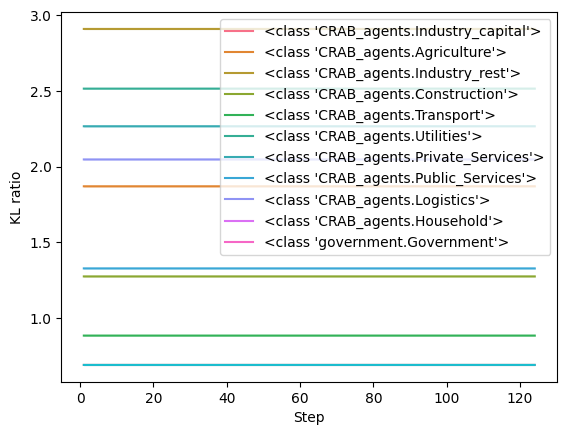

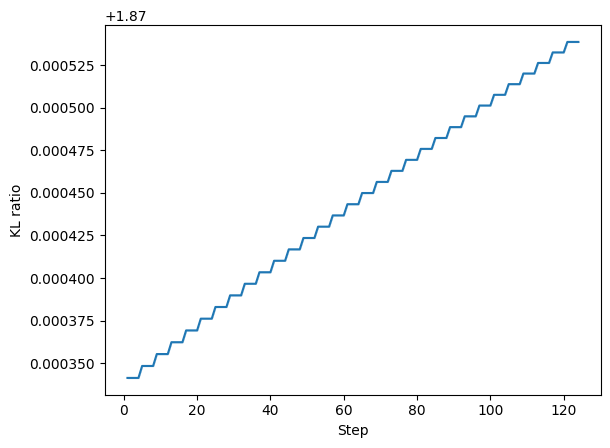

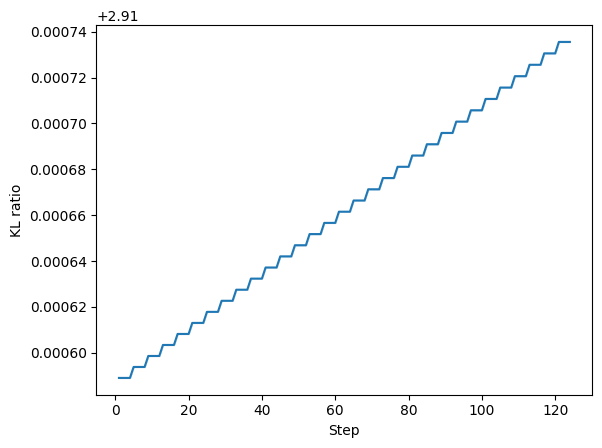

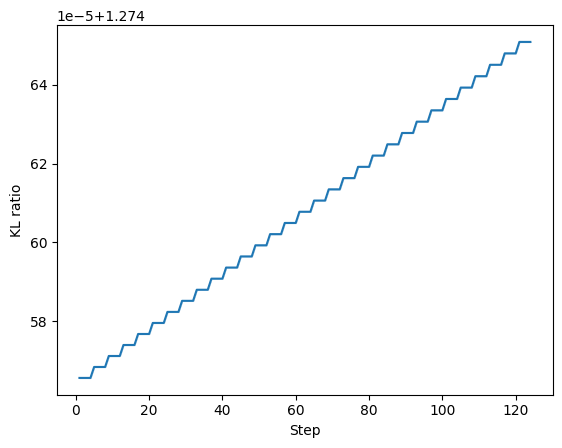

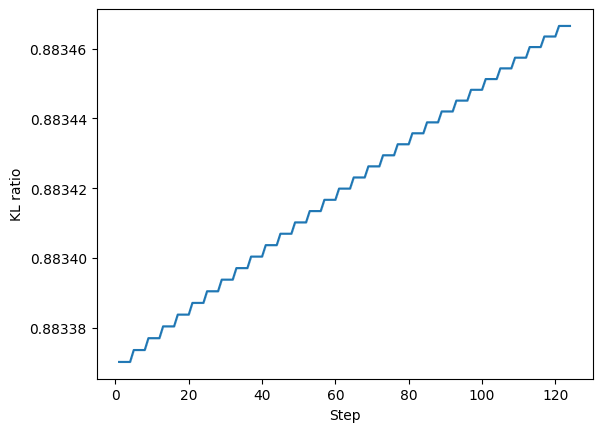

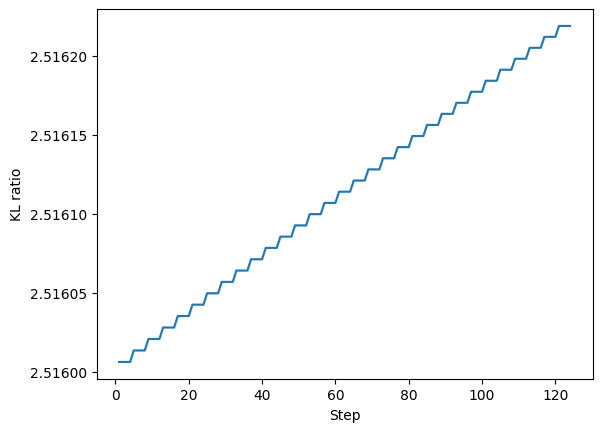

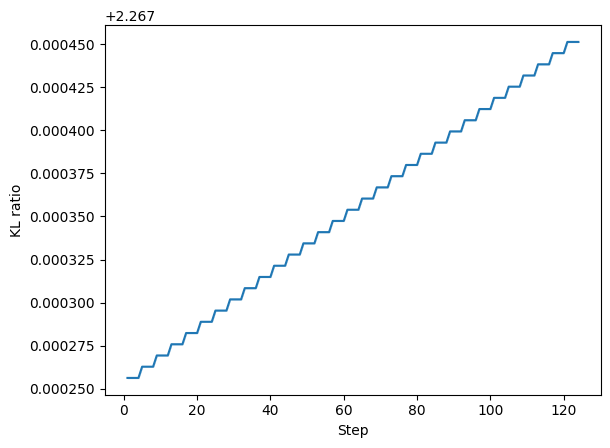

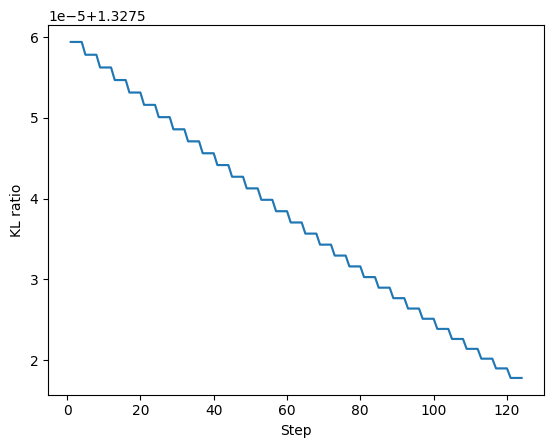

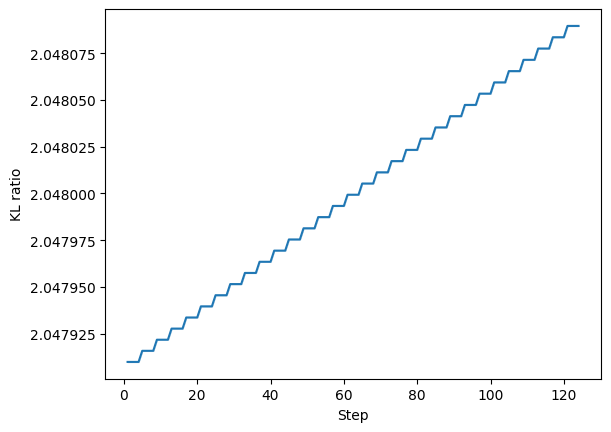

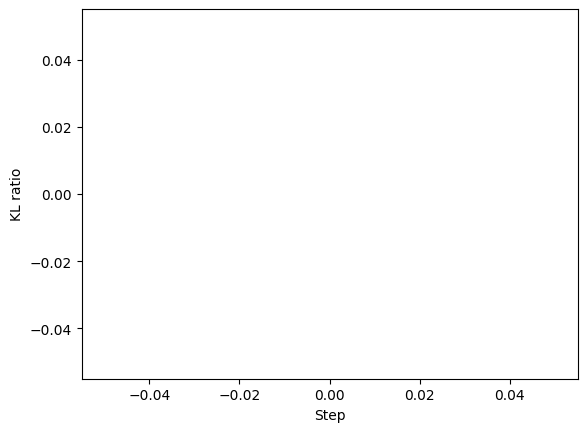

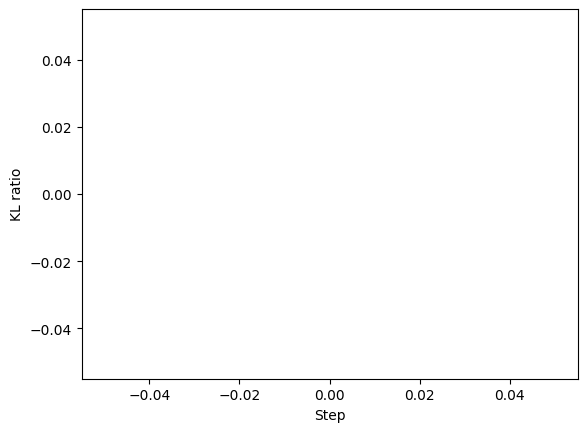

In [39]:
sns.lineplot(data=micro_variables, x='Step', y='KL ratio', hue = 'Type')
# do it for each type 
types = micro_variables['Type'].unique()
for t in types:
    sns.lineplot(data=micro_variables[micro_variables['Type'] == t], x='Step', y='KL ratio')
    plt.show()

In [30]:
micro_variables

Type   Net worth     Price  \
Step AgentID                                                                 
1    1        <class 'CRAB_agents.Industry_capital'>  100.000000  1.166000   
     2        <class 'CRAB_agents.Industry_capital'>  100.000000  1.253000   
     3        <class 'CRAB_agents.Industry_capital'>  100.000000  1.231000   
     4        <class 'CRAB_agents.Industry_capital'>  100.000000  1.232000   
     5        <class 'CRAB_agents.Industry_capital'>  100.000000  1.225000   
...                                              ...         ...       ...   
124  12575           <class 'CRAB_agents.Utilities'>   32.415918  1.210252   
     12576           <class 'CRAB_agents.Utilities'>   48.584396  1.213093   
     12577    <class 'CRAB_agents.Private_Services'>   45.217414  1.198724   
     12578     <class 'CRAB_agents.Public_Services'>   32.795838  1.348299   
     12579           <class 'CRAB_agents.Logistics'>   37.145285  1.279745   

              Market share   Prod  Inventories  N ordered  Production made  \
Step AgentID                                                                 
1    1            0.006667  1.109         1.11        0.0             1.11   
     2            0.006667  1.067         1.07        0.0             1.07   
     3            0.006667  1.045         1.04        0.0             1.04   
     4            0.006667  1.071         1.07        0.0             1.07   
     5            0.006667  1.066         1.07        0.0             1.07   
...                    ...    ...          ...        ...              ...   
124  12575        0.000000  1.054         0.00        0.0             1.00   
     12576        0.000000  1.053         0.00        0.0             1.00   
     12577        0.000000  1.053         0.00        0.0             1.00   
     12578        0.000000  1.054         0.00        0.0             1.00   
     12579        0.000000  1.052         0.00        0.0             1.00   

              Feasible production  Sum past demand  Past demand  Real demand  \
Step AgentID                                                                   
1    1                        1.0              3.0          1.0          0.0   
     2                        1.0              3.0          1.0          0.0   
     3                        1.0              3.0          1.0          0.0   
     4                        1.0              3.0          1.0          0.0   
     5                        1.0              3.0          1.0          0.0   
...                           ...              ...          ...          ...   
124  12575                    NaN              2.0          1.0          1.0   
     12576                    NaN              2.0          1.0          1.0   
     12577                    NaN              2.0          1.0          1.0   
     12578                    NaN              2.0          1.0          1.0   
     12579                    NaN              2.0          1.0          1.0   

                  Wage  Debt  Size  \
Step AgentID                         
1    1        0.994338   0.0   1.0   
     2        1.028585   0.0   1.0   
     3        0.990151   0.0   1.0   
     4        1.015594   0.0   1.0   
     5        1.004832   0.0   1.0   
...                ...   ...   ...   
124  12575    1.047000   NaN   0.0   
     12576    1.037000   NaN   0.0   
     12577    0.999000   NaN   0.0   
     12578    1.079000   NaN   0.0   
     12579    1.037000   NaN   0.0   

                                                       Supplier  Labor demand  \
Step AgentID                                                                    
1    1        <CRAB_agents.Industry_capital object at 0x13f6...           1.0   
     2        <CRAB_agents.Industry_capital object at 0x13e6...           1.0   
     3        <CRAB_agents.Industry_capital object at 0x13f2...           1.0   
     4        <CRAB_agents.Industry_capital object at 0x13fe...           1.0

In [3]:
model = load_model('saved_model_test.pkl')

In [4]:
macro_variable = model.datacollector.get_model_vars_dataframe()

<Axes: >

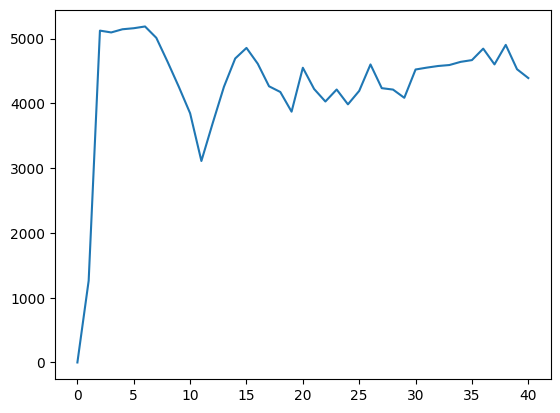

In [7]:
macro_variable['GDP'].plot()

<Axes: >

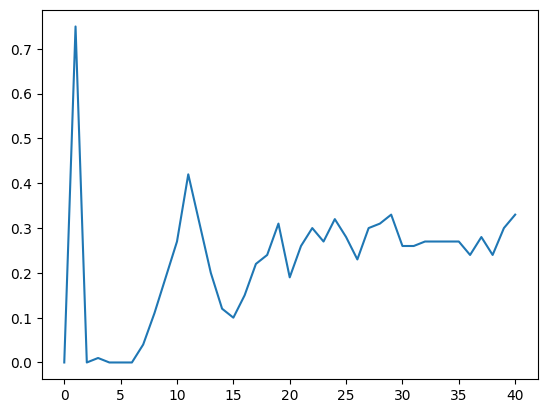

In [6]:
macro_variable['Unemployment rate coastal'].plot()

<Axes: >

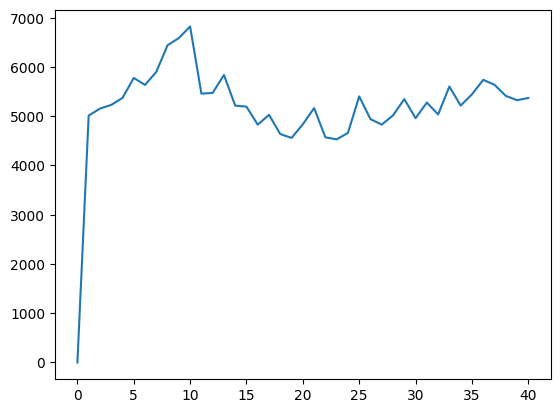

In [8]:
macro_variable.CONSUMPTION.plot()

In [9]:
seeds = [0, 40816326, 61224489, 81632652, 102040816, 122448979,
         142857142, 163265305, 183673469, 204081632, 224489795, 244897958,
         265306122, 285714285, 306122448, 326530611, 346938775, 367346938,
         387755101, 408163264, 428571428, 448979591, 469387754, 489795917,
         510204081, 530612244, 551020407, 571428570, 591836734, 612244897,
         632653060, 653061223, 673469387, 693877550, 714285713, 734693876,
         755102040, 775510203, 795918366, 816326529, 836734693, 857142856,
         877551019, 897959182, 918367346, 938775509, 959183672, 979591835,
         999999999]

In [10]:
len(seeds)

49